In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LogNorm
from matplotlib import cm
import numpy as np
import grain_collision_gong2021 as gc

Setting up parameters

In [2]:
Re = 1.0e8 #Reynolds number
gc_K = gc.GrainCollision(gc.KolmogorovTurbulence(Re)) #class for Kolmogorov turbulence model
gc_IK = gc.GrainCollision(gc.IKTurbulence(Re)) #class for IK turbulence model
gc_MRI = gc.GrainCollision(gc.MRITurbulence(Re)) #class for MRI turbulence model in Gong et al. 2020 (paperI)
st1 = np.logspace(-7, 3, 100) #Stokes number for grain 1
st2 = np.logspace(-7, 3, 100) #Stokes number for grain 2
St1, St2 = np.meshgrid(st1, st2) #2D grid of the Stokes numbers
shape = St1.shape
#collisional velocities from analytic approximation
vc_komogorov_analytic = np.zeros(shape)
vc_IK_analytic = np.zeros(shape)
vc_MRI_analytic = np.zeros(shape)
#collisional velocities from numerical integration
vc_komogorov = np.zeros(shape) 
vc_IK = np.zeros(shape)
vc_MRI = np.zeros(shape)
levels = np.linspace(-3, 0, 13) #color scale levels

Calculate the collisional velocities with analytic approximation. Note this is very fast.

In [3]:
for i in np.arange(shape[0]):
    for j in np.arange(shape[1]):
        vc_komogorov_analytic[i, j] = gc_K.get_vcoll_analytic(St1[i, j], St2[i, j])
        vc_IK_analytic[i, j] = gc_IK.get_vcoll_analytic(St1[i, j], St2[i, j])
        vc_MRI_analytic[i, j] = gc_MRI.get_vcoll_analytic(St1[i, j], St2[i, j])

Plot collisional velocities from analytic approximation. Same as the middel panels in Figure 2, Gong et al. (2021), https://arxiv.org/abs/2106.09525

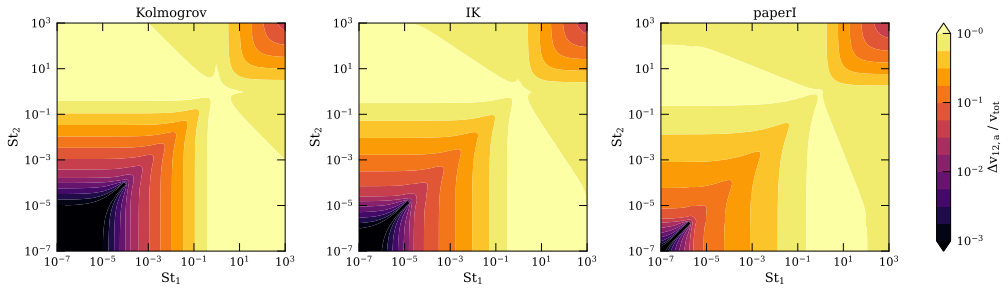

In [4]:
fig = plt.figure(figsize=[16.5, 4.2])
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.1)
ax1 = fig.add_subplot(gs[0,0], aspect="equal")
z1 = np.log10(vc_komogorov_analytic.transpose()+1e-50)
z2 = np.log10(vc_IK_analytic.transpose()+1e-50)
z3 = np.log10(vc_MRI_analytic.transpose()+1e-50)
#ax1
cax1 = ax1.contourf(St1.transpose(), St2.transpose(), z1,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax1.set_title("Kolmogrov")
#ax2
ax2 = fig.add_subplot(gs[0,1], aspect="equal")
cax2 = ax2.contourf(St1.transpose(), St2.transpose(), z2,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax2.set_title("IK")
#ax3
ax3 = fig.add_subplot(gs[0,2], aspect="equal")
cax3 = ax3.contourf(St1.transpose(), St2.transpose(), z3,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax3.set_title("paperI")
#cbar
axC0 = fig.add_subplot(gs[0,3])
cbar0=fig.colorbar(cax1, cax=axC0, ticks=[-3, -2, -1, 0])
cbar0.ax.set_yticklabels(["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{-0}$"])
cbar0.ax.minorticks_off()
cbar0.set_label(r"$\Delta v_{12,a}\ /\ v_{tot}$")
cbar0.solids.set_edgecolor("face")
ax1.set_ylabel("$St_2$")
for ax in [ax1, ax2, ax3]:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$St_1$")
    ax.set_ylabel("$St_2$")
    ax.set_xlim([1e-7, 1e3])
    ax.set_ylim([1e-7, 1e3])

Calculate the collisional velocities with analytic approximation. Note this is slow.

In [5]:
for i in np.arange(shape[0]):
    for j in np.arange(shape[1]):
        vc_komogorov[i, j] = gc_K.get_vcoll(St1[i, j], St2[i, j])
        vc_IK[i, j] = gc_IK.get_vcoll(St1[i, j], St2[i, j])
        vc_MRI[i, j] = gc_MRI.get_vcoll(St1[i, j], St2[i, j])

Plot collisional velocities from numerical integration. Same as the upper panels in Figure 2, Gong et al. (2021), https://arxiv.org/abs/2106.09525

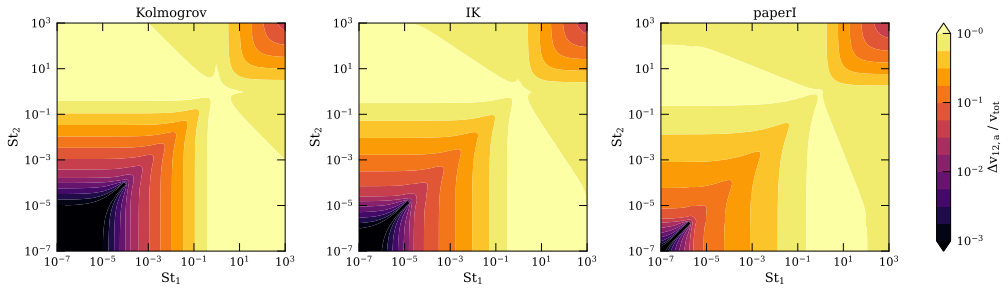

In [6]:
fig = plt.figure(figsize=[16.5, 4.2])
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.1)
ax1 = fig.add_subplot(gs[0,0], aspect="equal")
z1 = np.log10(vc_komogorov_analytic.transpose()+1e-50)
z2 = np.log10(vc_IK_analytic.transpose()+1e-50)
z3 = np.log10(vc_MRI_analytic.transpose()+1e-50)
#ax1
cax1 = ax1.contourf(St1.transpose(), St2.transpose(), z1,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax1.set_title("Kolmogrov")
#ax2
ax2 = fig.add_subplot(gs[0,1], aspect="equal")
cax2 = ax2.contourf(St1.transpose(), St2.transpose(), z2,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax2.set_title("IK")
#ax3
ax3 = fig.add_subplot(gs[0,2], aspect="equal")
cax3 = ax3.contourf(St1.transpose(), St2.transpose(), z3,
                    levels, vmin=-3, vmax=0.04139269, extend="both")
ax3.set_title("paperI")
#cbar
axC0 = fig.add_subplot(gs[0,3])
cbar0=fig.colorbar(cax1, cax=axC0, ticks=[-3, -2, -1, 0])
cbar0.ax.set_yticklabels(["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{-0}$"])
cbar0.ax.minorticks_off()
cbar0.set_label(r"$\Delta v_{12,a}\ /\ v_{tot}$")
cbar0.solids.set_edgecolor("face")
ax1.set_ylabel("$St_2$")
for ax in [ax1, ax2, ax3]:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$St_1$")
    ax.set_ylabel("$St_2$")
    ax.set_xlim([1e-7, 1e3])
    ax.set_ylim([1e-7, 1e3])

Plot the difference between analytic approximation and numerical integration of collsional velocities. Same as the bottom panels in Figure 2, Gong et al. (2021), https://arxiv.org/abs/2106.09525

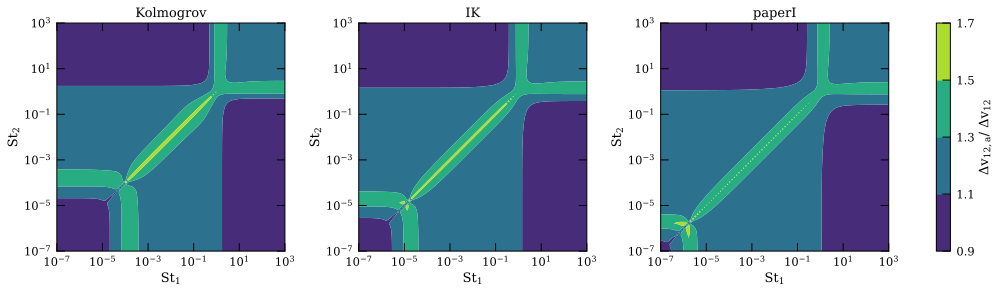

In [7]:
levels_diff = np.linspace(0.9, 1.7, 5)
fig = plt.figure(figsize=[16.5, 4.2])
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05], wspace=0.1)
ax1 = fig.add_subplot(gs[0,0], aspect="equal")
z1 = vc_komogorov.transpose()+1e-30
z2 = vc_IK.transpose()+1e-30
z3 = vc_MRI.transpose()+1e-30
z1a = vc_komogorov_analytic.transpose()+1e-30
z2a = vc_IK_analytic.transpose()+1e-30
z3a = vc_MRI_analytic.transpose()+1e-30
#ax1
cax1 = ax1.contourf(St1.transpose(), St2.transpose(), z1a/z1,
                    levels_diff, vmin=0.9, vmax=1.7, cmap=cm.viridis)
ax1.set_title("Kolmogrov")
#ax2
ax2 = fig.add_subplot(gs[0,1], aspect="equal")
cax2 = ax2.contourf(St1.transpose(), St2.transpose(), z2a/z2,
                    levels_diff, vmin=0.9, vmax=1.7, cmap=cm.viridis)
ax2.set_title("IK")
#ax3
ax3 = fig.add_subplot(gs[0,2], aspect="equal")
cax3 = ax3.contourf(St1.transpose(), St2.transpose(), z3a/z3,
                    levels_diff, vmin=0.9, vmax=1.7, cmap=cm.viridis)
ax3.set_title("paperI")
#cbar
axC0 = fig.add_subplot(gs[0,3])
cbar0=fig.colorbar(cax1, cax=axC0)
cbar0.ax.minorticks_off()
cbar0.set_label(r"$\Delta v_{12,a} /\ \Delta v_{12}$")
cbar0.solids.set_edgecolor("face")
ax1.set_ylabel("$St_2$")
for ax in [ax1, ax2, ax3]:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("$St_1$")
    ax.set_ylabel("$St_2$")
    ax.set_xlim([1e-7, 1e3])
    ax.set_ylim([1e-7, 1e3])